In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [91]:
base = pd.read_csv('base_segundo_encontro.csv', encoding='latin-1', sep=';')
base

,tempo_conversa_min,risadas,pontos_comuns,nivel_timidez,mensagens_antes,iniciativa_conversa,local_encontro,momento_da_vida,segundo_encontro
0,112,16,6,0,45,8,Restaurante,Estressado,Sim
1,102,13,2,10,41,6,Bar,Estável,Sim
2,24,8,2,3,16,9,Café,Estável,Sim
3,116,7,4,0,8,4,Bar,Estressado,Sim
4,81,1,2,5,5,7,Parque,Estável,Não
...,...,...,...,...,...,...,...,...,...
995,129,19,6,0,25,8,Bar,Estável,Sim
996,68,17,5,6,12,3,Restaurante,Estável,Sim
997,137,5,3,7,7,7,Parque,Cansado,Sim
998,123,10,1,10,27,8,Bar,Estressado,Não


Data Cleaning e Gráficos

In [92]:
base.isnull().sum()

tempo_conversa_min     0
risadas                0
pontos_comuns          0
nivel_timidez          0
mensagens_antes        0
iniciativa_conversa    0
local_encontro         0
momento_da_vida        0
segundo_encontro       0
dtype: int64

<Axes: xlabel='segundo_encontro', ylabel='count'>

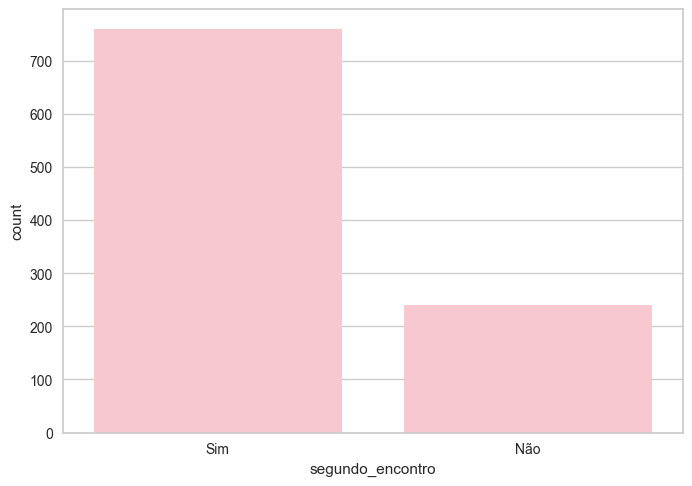

In [93]:
sns.countplot(x= base['segundo_encontro'], color='pink')

<Axes: xlabel='local_encontro', ylabel='count'>

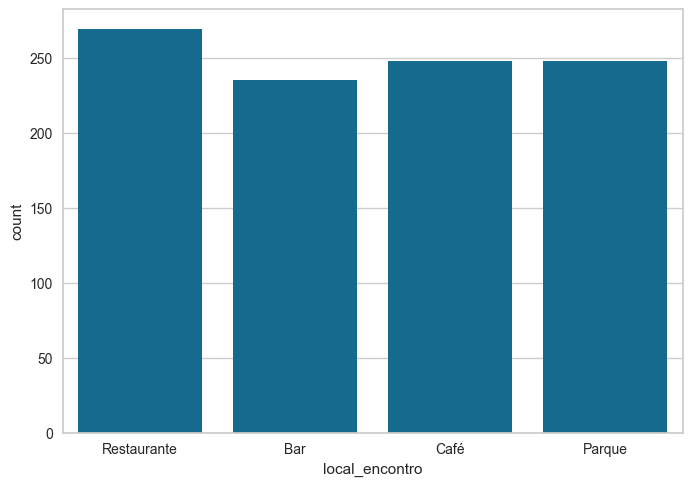

In [94]:
sns.countplot(x= base['local_encontro'])

<Axes: xlabel='momento_da_vida', ylabel='count'>

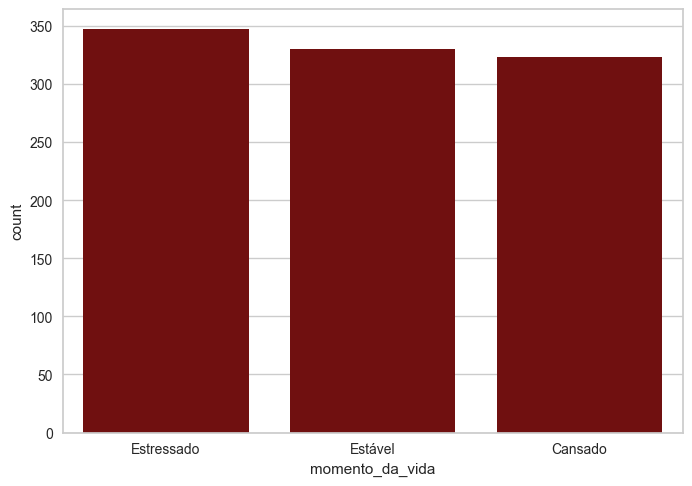

In [95]:
sns.countplot(x= base['momento_da_vida'], color='maroon')

Definir colunas, aplicação do OneHotEncoder e StandardScaler

In [96]:
x_dates = base.iloc[:, 0:8].values
y_dates = base.iloc[:, 8].values

In [97]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencoder_features = ColumnTransformer(
    transformers=[('OneHot', OneHotEncoder(), [6,7])], 
    remainder='passthrough')


In [98]:
x_dates = onehotencoder_features.fit_transform(x_dates)

In [ ]:
x_dates.shape, y_dates.shape
# o OneHotEnconder transforma as duas colunas em cinco, por isso o número aumenta

((1000, 13), (1000,))

In [100]:
from sklearn.preprocessing import StandardScaler
scaler_dates = StandardScaler()
x_dates = scaler_dates.fit_transform(x_dates)

In [101]:
from sklearn.model_selection import train_test_split

x_dates_train, x_dates_test, y_dates_train, y_dates_test = train_test_split(x_dates, y_dates, test_size=0.2, random_state=0)
x_dates_train.shape, x_dates_test.shape

((800, 13), (200, 13))

In [102]:
y_dates_train.shape, y_dates_test.shape

((800,), (200,))

Treinamento

In [103]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0)
svm.fit(x_dates_train, y_dates_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [104]:
x_dates_test

array([[-0.55424682,  1.74133801, -0.57427105, ...,  1.26674323,
        -0.9729692 ,  0.59283263],
       [-0.55424682, -0.57427105, -0.57427105, ..., -1.23732049,
         1.60766596, -1.3174766 ],
       [-0.55424682, -0.57427105, -0.57427105, ..., -0.92431252,
         0.70095631,  0.9112175 ],
       ...,
       [-0.55424682,  1.74133801, -0.57427105, ...,  0.01471137,
        -0.48474093,  1.22960237],
       [ 1.8042503 , -0.57427105, -0.57427105, ..., -0.29829659,
        -0.76372851, -1.3174766 ],
       [-0.55424682, -0.57427105, -0.57427105, ..., -0.92431252,
        -1.25195679, -0.99909173]], shape=(200, 13))

In [105]:
previsoes = svm.predict(x_dates_test)
previsoes

array(['Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim',
       'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Não',
       'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim',
       'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Não', 'Não', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não',
       'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim',

In [106]:
y_dates_test

array(['Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim',
       'Não', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Não',
       'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim',
       'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Não', 'Não', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não',
       'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim',

In [107]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_dates_test, previsoes)

0.995

0.995

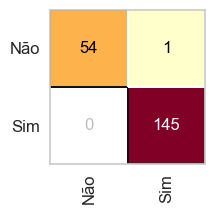

In [108]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(2,2))
cm = ConfusionMatrix(svm)
cm.fit(x_dates_train, y_dates_train)
cm.score(x_dates_test, y_dates_test)

In [109]:
kernels=['linear', 'rbf', 'sigmoid', 'poly']
Cs = [0.1, 1, 2, 10]
best_score = 0
best_kernel = None
best_C = 0

for i in kernels:
    for j in Cs:
        svm = SVC(kernel= i , C= j)
        svm.fit(x_dates_train, y_dates_train)
        previsoes = svm.predict(x_dates_test)
        score = accuracy_score(y_dates_test, previsoes)
        
        if score > best_score:
            best_score = score
            best_kernel = i
            best_C = j

print(f"\nBest score: {best_score}")
print(f"\nBest kernel: {best_kernel}")
print(f"\nBest C: {best_C}")


Best score: 0.995

Best kernel: linear

Best C: 1


Criação do novo DataFrame com os inputs

In [110]:
def inputs(base):
    dados = {}

    for column in base.columns:
        resposta = input(f"{column}: ")
        dados[column] = resposta

    input_df = pd.DataFrame([dados])
    return input_df

In [111]:
base_inputs = inputs(base)

In [112]:
base_inputs

,tempo_conversa_min,risadas,pontos_comuns,nivel_timidez,mensagens_antes,iniciativa_conversa,local_encontro,momento_da_vida,segundo_encontro
0,12,3,4,7,10,3,Restaurante,Cansado,


In [113]:
x_inputs = base_inputs.iloc[:, 0:8].values
y_inputs = base_inputs.iloc[:, 8].values

In [114]:
x_inputs

array([['12', '3', '4', '7', '10', '3', 'Restaurante', 'Cansado']],
      dtype=object)

Aplicação do OneHotEnconder e StandardScaler nos dados de input

In [115]:
x_inputs = onehotencoder_features.transform(x_inputs)

In [116]:
x_inputs.shape, y_inputs.shape

((1, 13), (1,))

In [117]:
x_inputs = scaler_dates.transform(x_inputs)

In [118]:
x_inputs

array([[-0.55424682, -0.57427105, -0.57427105,  1.6484757 ,  1.44774833,
        -0.72896747, -0.70181003, -1.67192664, -1.11206837, -0.30135543,
         0.6407273 , -1.0427161 , -0.68070686]])

In [119]:
previsoes = svm.predict(x_inputs)
print(f"Terá um segundo encontro: {previsoes[0]}!")

Terá um segundo encontro: Não!
